In [152]:
%run IDM_helper_functions.ipynb

## Train IDM

In [153]:
# Training data  52500, W_neg = 8400
n_sim_train = 100000
prior = utils.BoxUniform(low=[0,0.2,0.1,0.01,52000, 8200], high=[0.8,0.6,0.6,0.1,53000, 8600])
param = prior.sample((n_sim_train,))
x_IDM_train = simul_IDM_EM6(np.array(param))

sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000
sim20000
sim21000
sim22000
sim23000
sim24000
sim25000
sim26000
sim27000
sim28000
sim29000
sim30000
sim31000
sim32000
sim33000
sim34000
sim35000
sim36000
sim37000
sim38000
sim39000
sim40000
sim41000
sim42000
sim43000
sim44000
sim45000
sim46000
sim47000
sim48000
sim49000
sim50000
sim51000
sim52000
sim53000
sim54000
sim55000
sim56000
sim57000
sim58000
sim59000
sim60000
sim61000
sim62000
sim63000
sim64000
sim65000
sim66000
sim67000
sim68000
sim69000
sim70000
sim71000
sim72000
sim73000
sim74000
sim75000
sim76000
sim77000
sim78000
sim79000
sim80000
sim81000
sim82000
sim83000
sim84000
sim85000
sim86000
sim87000
sim88000
sim89000
sim90000
sim91000
sim92000
sim93000
sim94000
sim95000
sim96000
sim97000
sim98000
sim99000


In [154]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(param, x_IDM_train)
mnle = trainer.train()

 Neural network successfully converged after 34 epochs.

In [5]:
mcmc_parameters = dict(num_chains=10,thin=10,warmup_steps=50,init_strategy="proposal")

## Simulate from LCA and fit with IDM

In [160]:
prior_LCA = utils.BoxUniform(low=[1,1,0,-0.6,0.6,0.2], high=[2,1,0.4,0,2,0.5])
LCA_parameters = prior_LCA.sample((20,))

n_trials = 300
sim_num = 20

par_fitted = np.zeros((sim_num,6))

In [ ]:
for i in range(sim_num):
    print(i)
    LCA_o = simul_LCA_full(np.tile(LCA_parameters[i,:], (n_trials,1))) # simulate IDM data
    print(LCA_o[0:5,:])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(LCA_o)
    mnle_map = mnle_posterior.map()
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)

0
sim0
tensor([[0.8139, 0.0000],
        [0.4509, 1.0000],
        [0.5819, 0.0000],
        [0.8859, 0.0000],
        [0.6069, 0.0000]])


C:\Users\ra36qix\Documents\GitHub\sbi\sbi\utils\sbiutils.py:316: UserWarning: An x with a batch size of 300 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  warnings.warn(


[2.5453770e-01 2.0269431e-01 2.0089383e-01 1.3293803e-02 5.2963305e+04
 8.3267402e+03]
1
sim0
tensor([[0.2873, 1.0000],
        [0.3073, 1.0000],
        [0.3133, 0.0000],
        [0.4783, 0.0000],
        [0.3763, 1.0000]])
[7.7132724e-02 2.5994158e-01 1.7955652e-01 5.4523960e-02 5.2489062e+04
 8.2735693e+03]
2
sim0
tensor([[0.6451, 1.0000],
        [0.5591, 1.0000],
        [0.5121, 1.0000],
        [0.5581, 1.0000],
        [0.7821, 1.0000]])


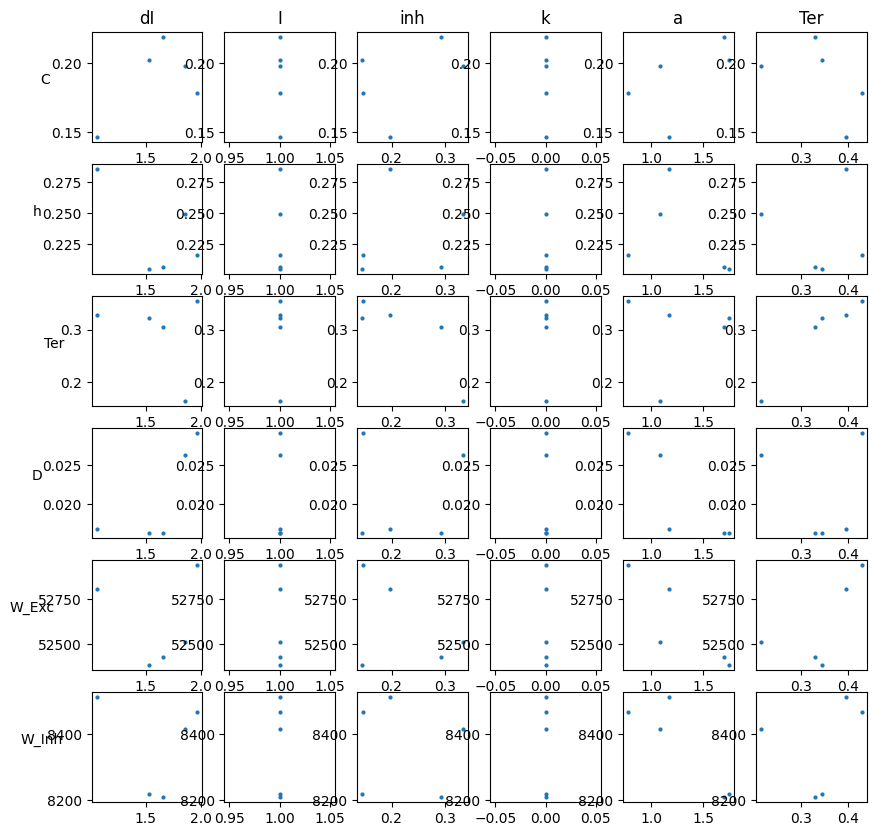

In [157]:
par_labels = ["dI", "I", "inh", "k","a","Ter"]
par_fitted_labels = ["C", "h", "Ter", "D","W_Exc", "W_Inh"]
sim_fit_plot_all(LCA_parameters[:5,:], par_fitted[:5,:], par_labels, par_fitted_labels)



In [ ]:
LCA_o_correct = LCA_o[LCA_o[:,1]==0]
LCA_o_error = LCA_o[LCA_o[:,1]==1]
print(LCA_parameters[i,:])
print(LCA_o_correct[:,0].shape)

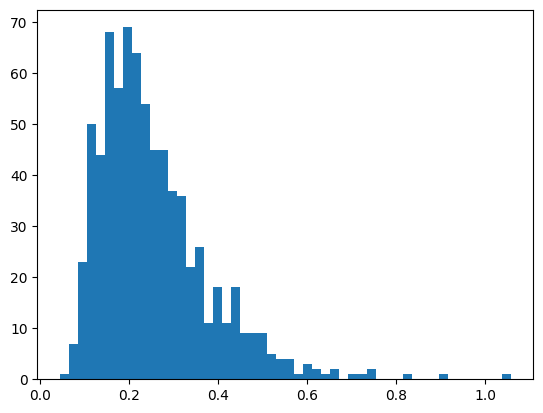

In [146]:
plt.hist(LCA_o_correct[:,0], bins = 50)
plt.show()

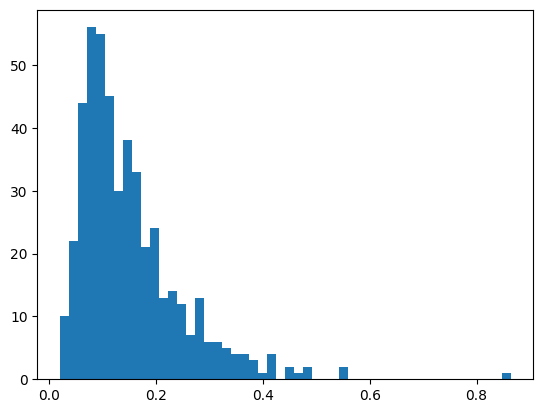

In [125]:
plt.hist(LCA_o_error[:,0], bins = 50)
plt.show()

tensor([0.2919, 0.9177, 7.9962, 7.1314, 0.4427, 0.2263])

torch.Size([511])